In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
import scipy as sy
from scipy.integrate import odeint

In [2]:
phi,V0,lam_sym = sp.symbols('phi V0 lam',real =True)


V=V0*(1-sp.exp(-sp.sqrt(2/3)*phi))**2
dVdphi = sp.diff(V,phi)
d2Vdphi2 = sp.diff(V,phi,2)
lam = -1/V *dVdphi
gam = (d2Vdphi2*V)/(dVdphi**2)

lam_simplified = sp.simplify(lam)
print("lam(phi) =", lam_simplified)

# Substitute phi(lambda)
phi_of_lam = sp.sqrt(3/2) * sp.log(1 + 2*sp.sqrt(2/3)/lam_sym)
gam_of_lam = gam.subs(phi, phi_of_lam)
gam_of_lam_simplified = sp.simplify(gam_of_lam)
print(rf"gamma(lam) =", gam_of_lam_simplified)

#test = gam_of_lam_simplified.subs(lam_sym,5)
#print(test)

lam(phi) = 1.63299316185545/(1 - exp(0.816496580927726*phi))
gamma(lam) = 1.0 - 0.5*((lam + 1.63299316185545)/lam)**1.0


<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2930/1652279173.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Starobinsky potential $V(\phi)$ vs scalar field $\phi$')


Text(0.5, 1.0, 'Starobinsky potential $V(\\phi)$ vs scalar field $\\phi$')

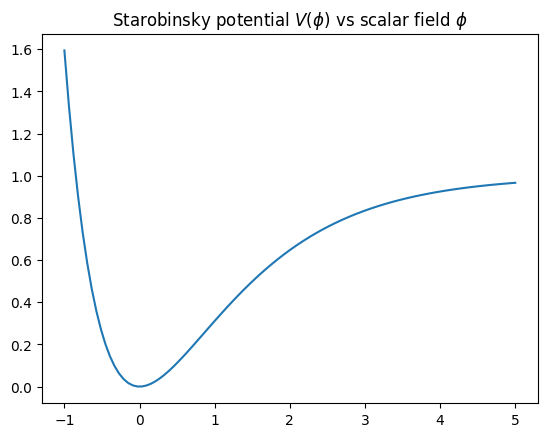

In [3]:
#Starobinsky potential model
phi = np.linspace(-1,5,100)
V_0= 1
V=V_0*(1-np.exp(-((2/3)**0.5)*phi))**2
plt.plot(phi,V)
plt.title('Starobinsky potential $V(\phi)$ vs scalar field $\phi$')

<>:29: SyntaxWarning: invalid escape sequence '\o'
<>:29: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_13533/2969625696.py:29: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(N_span, w, label='$\omega_\phi$')


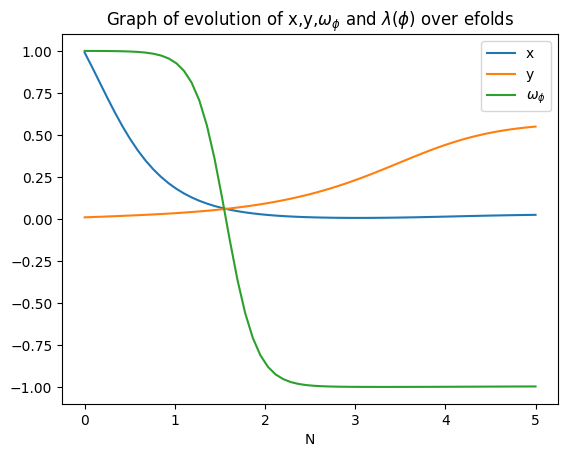

In [10]:
wb = -1/3  # dust

def Gamma(lam):
    return 1.0 - 0.5*((lam + (2/3)**0.5)/lam)**1.0  #1.0 - 0.5*((lam + 1.63299316185545)/lam)
                                             #1-0.5*((lam+2*np.sqrt(2/3))/lam)
def system(X,N):
    x, y, lam = X
    dx = (-3*x+ np.sqrt(3/2)*lam*y**2+1.5*x*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))  #shows how the kinetic energy density fraction grows over e folds
    dy = (-np.sqrt(3/2)*x*y*lam+ 1.5*y*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))  #shows how the potential energy density fraction grows over e folds
    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)  #shows the potnetial gradient change over e folds
    return [dx, dy, dlam]

# Initial conditions
X0 = [0.99, 0.01, 0.1]  #initial conditions for inflation, at inflation x<<y and y approaches 1, potential dominated.
N_span = np.linspace(0, 5, 60)# inflation lasted approx 60 efolds
#   early time inflation slow roll [0.01, 0.99, 0.01-1], wb=0, N=0-5
#   early time post inflation radiation dom time [0.05, 0.95, 1-3], wb=1/3, N=0-5
#   late time tracking [0.1, 0.1, 1-5], wb=0, N=0-60 or 100
#   late time tracking and scaling and DE [0.01, 0.01, 0.5] lambda dominated universe, wb = -1, N=0-60 or 100

sol = odeint(system, X0, N_span)
x = sol[:,0]
y = sol[:,1]
lam = sol[:,2]
w = (x**2 - y**2) / ((x**2 + y**2)+1e-18) #to avoid exploding to infinity, signals a singularity
plt.plot(N_span,x, label='x')
plt.plot(N_span, y, label='y')
#plt.plot(N_span, lam, label='$\lambda$')
plt.plot(N_span, w, label='$\omega_\phi$')
plt.title(rf"Graph of evolution of x,y,$\omega_\phi$ and $\lambda(\phi)$ over efolds")
plt.legend()
plt.xlabel("N")
plt.show()


<>:105: SyntaxWarning: invalid escape sequence '\p'
<>:105: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_13533/2674648554.py:105: SyntaxWarning: invalid escape sequence '\p'
  plt.fill_between(xs, ys, 1.5, alpha=0.3,label="Eternal acceleration condition barrier, $w_\phi < -1/3$")


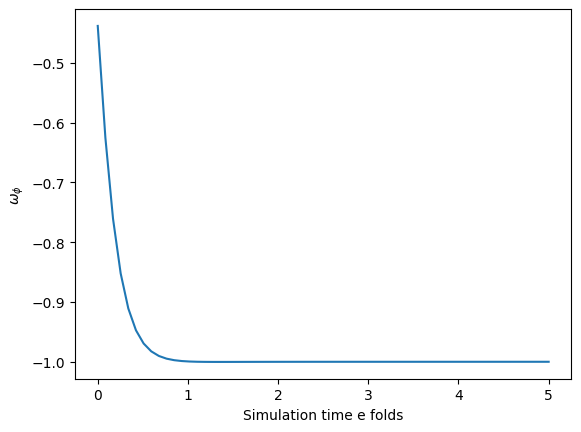

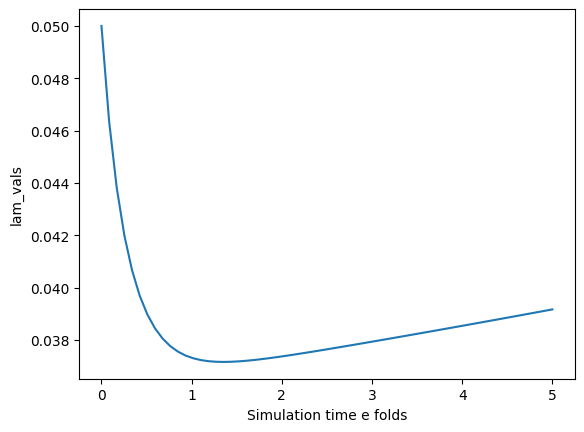

Plot of phase portrait xy at $\lambda$=0.0500
Physical fixed points: [[0.0, 0.0], [0.010204080968509355, -0.7069594826221957], [0.010204080968509355, 0.7069594826221957]]
Fixed points (0.0,0.0)
Eigen Values: [-1.5  1.5]
Type=node
Stability=saddle

Fixed points (0.010204080968509355,-0.7069594826221957)
Eigen Values: [-2.9990627+0.04329563j -2.9990627-0.04329563j]
Type=Spiral
Stability=Attractor

Fixed points (0.010204080968509355,0.7069594826221957)
Eigen Values: [-2.9990627+0.04329563j -2.9990627-0.04329563j]
Type=Spiral
Stability=Attractor



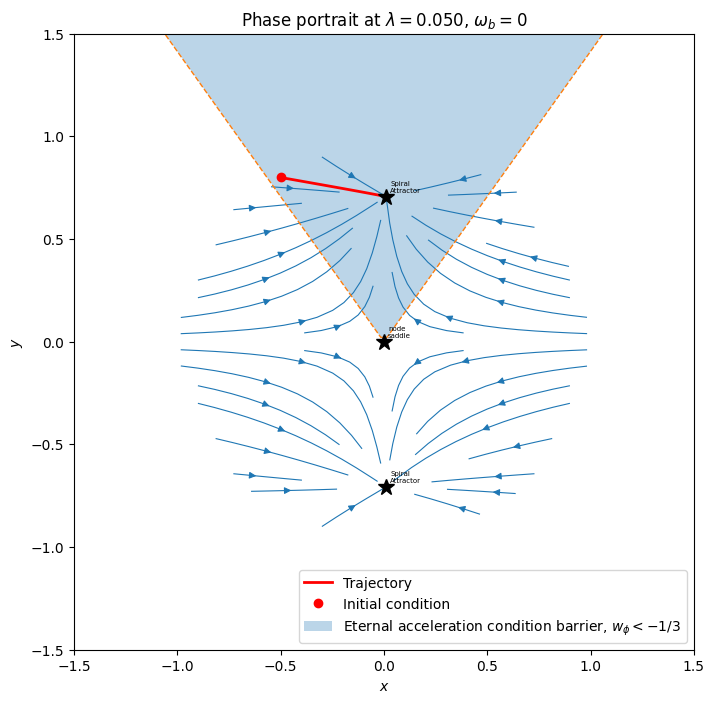

Plot of phase portrait xy at $\lambda$=0.0376
Physical fixed points: [[0.0, 0.0], [0.007677367981551021, -0.7070234098954626], [0.007677367981551021, 0.7070234098954626]]
Fixed points (0.0,0.0)
Eigen Values: [-1.5  1.5]
Type=node
Stability=saddle

Fixed points (0.007677367981551021,-0.7070234098954626)
Eigen Values: [-2.99946946+0.03257375j -2.99946946-0.03257375j]
Type=Spiral
Stability=Attractor

Fixed points (0.007677367981551021,0.7070234098954626)
Eigen Values: [-2.99946946+0.03257375j -2.99946946-0.03257375j]
Type=Spiral
Stability=Attractor



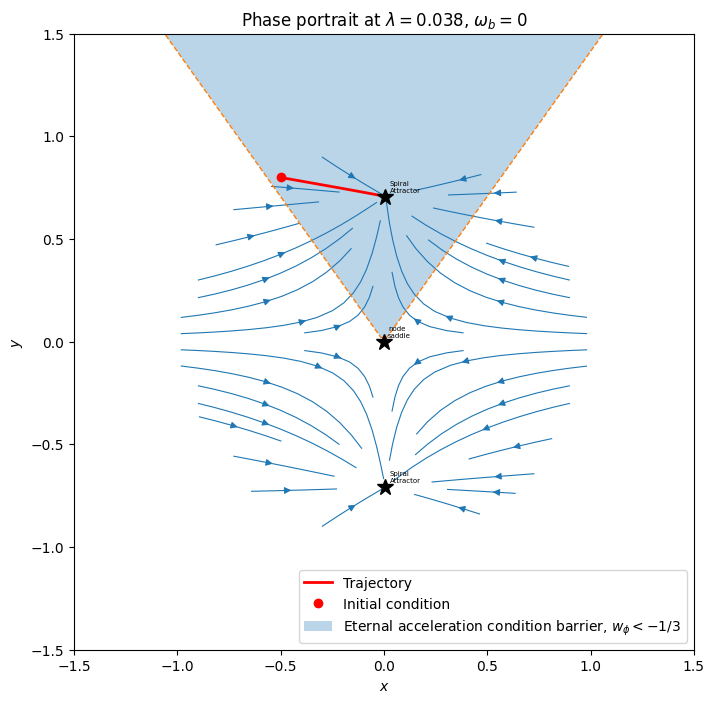

Plot of phase portrait xy at $\lambda$=0.0392
Physical fixed points: [[0.0, 0.0], [0.00799356571918962, -0.7070163997225014], [0.00799356571918962, 0.7070163997225014]]
Fixed points (0.0,0.0)
Eigen Values: [-1.5  1.5]
Type=node
Stability=saddle

Fixed points (0.00799356571918962,-0.7070163997225014)
Eigen Values: [-2.99942485+0.03391545j -2.99942485-0.03391545j]
Type=Spiral
Stability=Attractor

Fixed points (0.00799356571918962,0.7070163997225014)
Eigen Values: [-2.99942485+0.03391545j -2.99942485-0.03391545j]
Type=Spiral
Stability=Attractor



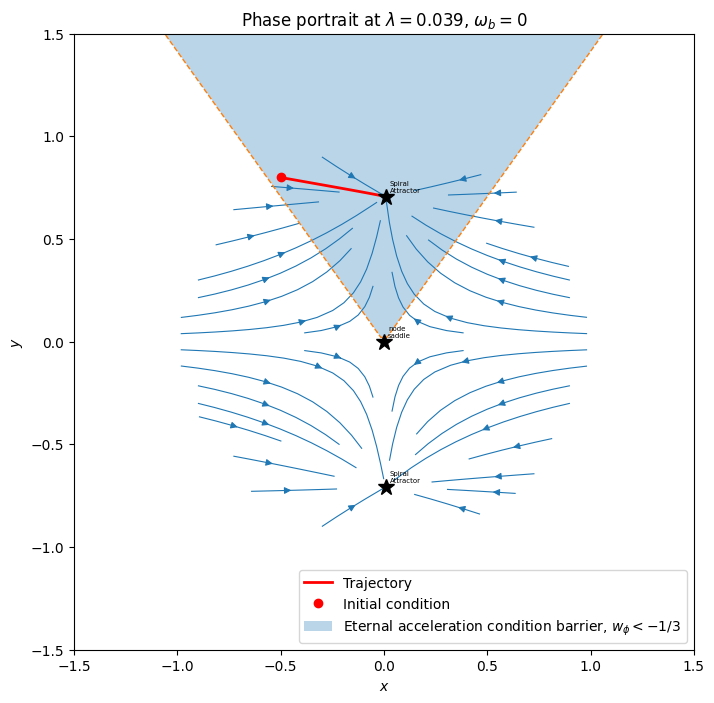

In [11]:
#  generating dynamical system phase portraits
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import sympy as sp

# define constants
wb = 0 #  to show inflationary era, wb=0 as scalar dominated so wb is irrelevant, for radiation era w=1/3, for matter era with dust w=0 and at late time scalar dominated w=0
lam_0 = 0.05 #arbitrary gradient of potential CHANGING THIS YIELDS A DIFFERENT VECTOR FIELD
# for a standard starobinsky model, 0.01<lambda<0.3 is a good range as is the potential slope. if lambda<<1 inflationary model, as lambda approaches 1, exits from inflation
# lambda = 1 transition phase, =1/3 slow roll, =0.05 quasi DeSitter appraoching


def Gamma(lam):
    lam = max(lam, 1e-6)
    return 1-0.5*((lam+2*np.sqrt(2/3))/lam)  #1.0 - 0.5*((lam + 1.63299316185545)/lam)
                                             #1-0.5*((lam+2*np.sqrt(2/3))/lam)
def dynamicsStateSpace(x,y,lam):
    #x, y, lam = X
    lam = max(lam, 1e-6)# avoids runaway lambda when kinetic energy domination goes to -
    dx = (-3*x+ np.sqrt(3/2)*lam*y**2+1.5*x*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))  #shows how the kinetic energy density fraction grows over e folds
    dy = (-np.sqrt(3/2)*x*y*lam+ 1.5*y*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))  #shows how the potential energy density fraction grows over e folds
    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)  #shows the potnetial gradient change over e folds
    return [dx, dy, dlam]

def dynamics_odeint(X,N):
  x,y,lam = X
  dx,dy,dlam = dynamicsStateSpace(x,y,lam)
  return [dx,dy,dlam]

# plot the dynamics on the same graph
initialState=np.array([-0.5,0.8,lam_0])# CHANGING THESE YIELDS A DIFFERENT TRAJECTORY. choose suitable starting position
# do several graphs with varying ICs, for inflationary model [0.01,0.99] gives potential dominated era and DeSitter asymptote (slow roll initial conditions).
# For a kinetic dominated start, ie a fast roll inflation leading to a slow roll as potential increases [0.8,0.6] adheres to the friedmann constraints.
simulationTime=np.linspace(0,5,60)#  number of e folds of time, inflation lasted 50-60
# generate the state-space trajectory
solutionState=odeint(dynamics_odeint,initialState,simulationTime,rtol=1e-10,atol=1e-10,mxstep=500)

x_vals = solutionState[:,0]
y_vals = solutionState[:,1]
lam_vals = solutionState[:,2]
w_phi = ((solutionState[:,0])**2-(solutionState[:,1])**2)/((solutionState[:,0])**2+(solutionState[:,1])**2)

plt.plot(simulationTime,w_phi)
plt.ylabel(rf'$\omega_\phi$')
plt.xlabel('Simulation time e folds')
plt.show()

plt.plot(simulationTime,lam_vals)
plt.ylabel('lam_vals')
plt.xlabel('Simulation time e folds')
plt.show()

#plotting phase portrait at lambda slice
def phase_plot_at_lam(lam_index):
  lam_slice = lam_vals[lam_index]
  print(rf"Plot of phase portrait xy at $\lambda$={lam_slice:.4f}")

  # defining a grid of points at which we create/compute tangent arrows
  x0 = np.linspace(-1.5,1.5,100)
  x1 = np.linspace(-1.5,1.5,100)
  X0,X1 = np.meshgrid(x0,x1)
  dX0 = np.zeros(X0.shape)
  dX1 = np.zeros(X1.shape)

  for i in range(X0.shape[0]):
      for j in range(X0.shape[1]):
          if X0[i,j]**2 + X1[i,j]**2 <= 1.0:
              dx,dy,_= dynamicsStateSpace(X0[i,j], X1[i,j], lam_slice)
              dX0[i,j] = dx
              dX1[i,j] = dy
          else:
              dX0[i,j] = np.nan
              dX1[i,j] = np.nan

  x_FP, y_FP, = sp.symbols('x y', real=True)

  f = (-3*x_FP+ sp.sqrt(3/2)*lam_slice*y_FP**2+ 1.5*x_FP*((1-wb)*(x_FP**2-y_FP**2) + (1+wb)*(1-x_FP**2-y_FP**2)))
  g = (-sp.sqrt(3/2)*lam_slice*x_FP*y_FP + 1.5*y_FP*((1-wb)*(x_FP**2-y_FP**2)+ (1+wb)*(1-x_FP**2-y_FP**2)))
  h = -sp.sqrt(6)*x_FP*lam_slice**2*(Gamma(lam_slice) - 1)
  J_sym = sp.Matrix([f, g]).jacobian([x_FP, y_FP]) # Symbolic Jacobian

  solutions = sp.solve([f, g], [x_FP, y_FP], dict=True)
  FP=[]
  for sol in solutions:
    x_val = sol[x_FP]
    y_val = sol[y_FP]
    #lam_val = sol[lam_FP]
    if x_val.is_real and y_val.is_real:
        x_val,y_val = float(x_val),float(y_val)
        if abs(x_val)<=1.5 and abs(y_val)<=1.5:
          FP.append([float(x_val),float(y_val)])
  #FP=np.array(FP)
  print("Physical fixed points:", FP)

  plt.figure(figsize=(8,8))
  plt.streamplot(X0, X1, dX0, dX1, density=1.2, linewidth=0.8)
  plt.plot(x_vals, y_vals, 'r', lw=2, label='Trajectory')
  plt.plot(x_vals[0], y_vals[0], 'ro', label='Initial condition')

# eternal acc is w_phi<-1/3 leads to y=+-root(2) x
  xs = np.linspace(-1.5, 1.5,100)
  ys = np.sqrt(2)*np.abs(xs)
  plt.plot(xs,ys,'--',lw=1)
  plt.fill_between(xs, ys, 1.5, alpha=0.3,label="Eternal acceleration condition barrier, $w_\phi < -1/3$")


  def classify_FP(eigvals,temp=1e-10):
    Real = np.real(eigvals)
    Imag = np.imag(eigvals)
    if np.all(Real<-temp):
      stability = 'Attractor'
    elif np.all(Real>temp):
      stability = 'Repeller'
    elif np.any(Real<-temp) and np.any(Real > temp):
      stability = 'saddle'
    elif np.all(np.abs(Real) < temp):
      stability = 'Centre'
    else:
      stability = 'NaN'
    if np.any(np.abs(Imag)>temp):
      point_type = 'Spiral'
    else:
      point_type = 'node'

    return stability,point_type

  for fp in FP:
    x_c, y_c = fp
    J_num = np.array(J_sym.subs({x_FP:x_c,y_FP:y_c}),dtype=float)
    eigvals = np.linalg.eigvals(J_num)
    stability,point_type = classify_FP(eigvals)
    print(f'Fixed points ({x_c:},{y_c})')
    print('Eigen Values:',eigvals)
    print(f'Type={point_type}')
    print(f'Stability={stability}\n')
    plt.plot(x_c, y_c, 'k*', markersize=12)
    plt.text(x_c+0.02, y_c+0.02, f"{point_type}\n{stability}", fontsize=5)
    
    
  plt.xlabel(r"$x$")
  plt.ylabel(r"$y$")
  plt.title(rf"Phase portrait at $\lambda={lam_slice:.3f}$, $\omega_b={wb}$")
  plt.xlim(-1.5,1.5)
  plt.ylim(-1.5,1.5)
  plt.legend()
  plt.show()





slice_no = 3
index = np.linspace(0,len(lam_vals)-1,slice_no).astype(int)#forces integer
for i in range(slice_no):
   temp = int(index[i])
   phase_plot_at_lam(temp)


# https://aleksandarhaber.com/phase-portraits-of-state-space-models-and-differential-equations-in-python/, https://www.youtube.com/watch?v=DeeoiE22bZ8, method from https://iopscience.iop.org/article/10.1088/1475-7516/2018/01/018/meta


Physical fixed points: [[ 0.          0.        ]
 [ 0.08097041 -0.80905158]
 [ 0.08097041  0.80905158]]
Fixed points (0.0,0.0)
Eigen Values: [-1.  2.]
Type=node
Stability=NaN

Fixed points (0.08097041401969578,-0.8090515769018183)
Eigen Values: [-3.08590453 -3.82484418]
Type=node
Stability=Attractor

Fixed points (0.08097041401969578,0.8090515769018183)
Eigen Values: [-3.08590453 -3.82484418]
Type=node
Stability=Attractor



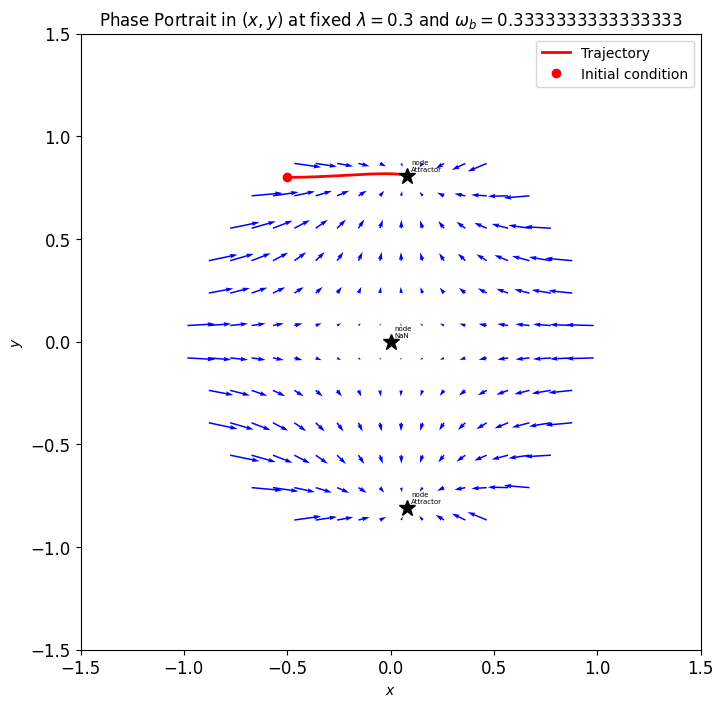

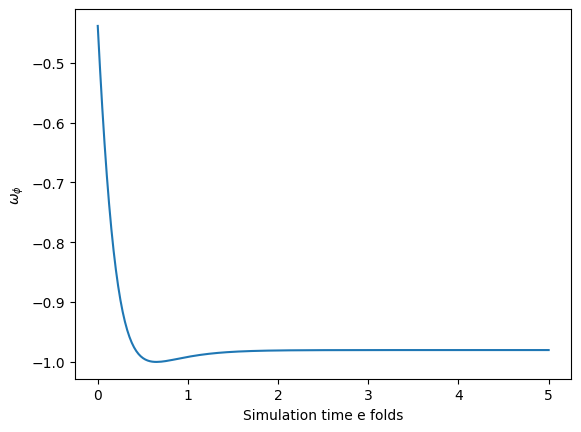

In [1]:
#  generating dynamical system phase portraits
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import sympy as sp

#dx = (-3*x + np.sqrt(3/2)*lam*y**2 + 1.5*x*((1-wb)*(x**2-y**2) + (1+wb)*(1-x**2-y**2)))
#dy = (-np.sqrt(3/2)*x*y*lam + 1.5*y*((1-wb)*(x**2-y**2) + (1+wb)*(1-x**2-y**2)))
#dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)

# define constants
wb = 1/3 #  to show inflationary era, wb=0 as scalar dominated so wb is irrelevant, for radiation era w=1/3, for matter era with dust w=0 and at late time scalar dominated w=0
lam_fixed = 0.3 #arbitrary gradient of potential CHANGING THIS YIELDS A DIFFERENT VECTOR FIELD
# for a standard starobinsky model, 0.01<lambda<0.3 is a good range as is the potential slope. if lambda<<1 inflationary model, as lambda approaches 1, exits from inflation
# lambda = 1 transition phase, =1/3 slow roll, =0.05 quasi DeSitter appraoching


def Gamma(lam):
    return 1 + 0.5*(1 - 2/lam**2)

def dynamicsStateSpace(x,y,lam):
  dXdt = [(-3*x + np.sqrt(3/2)*lam*y**2 + 1.5*x*((1-wb)*(x**2-y**2) + (1+wb)*(1-x**2-y**2))),
   (-np.sqrt(3/2)*x*y*lam + 1.5*y*((1-wb)*(x**2-y**2) + (1+wb)*(1-x**2-y**2))),
    -np.sqrt(6)*x*lam**2*(Gamma(lam) - 1)]

  return [dXdt[0],dXdt[1],dXdt[2]]

# defining a grid of points at which we create/compute tangent arrows
x0 = np.linspace(-1.5,1.5,30)
x1 = np.linspace(-1.5,1.5,20)
X0,X1 = np.meshgrid(x0,x1)
dX0 = np.zeros(X0.shape)
dX1 = np.zeros(X1.shape)
#shape1,shape2 = X1.shape

for i in range(X0.shape[0]):
    for j in range(X0.shape[1]):
        if X0[i,j]**2 + X1[i,j]**2 <= 1.0:
            dXdtAtX = dynamicsStateSpace(X0[i,j], X1[i,j], lam_fixed)
            dX0[i,j] = dXdtAtX[0]
            dX1[i,j] = dXdtAtX[1]
        else:
            dX0[i,j] = np.nan
            dX1[i,j] = np.nan

x_FP, y_FP = sp.symbols('x y', real=True)

f = (-3*x_FP+ sp.sqrt(3/2)*lam_fixed*y_FP**2+ 1.5*x_FP*((1-wb)*(x_FP**2-y_FP**2) + (1+wb)*(1-x_FP**2-y_FP**2)))

g = (-sp.sqrt(3/2)*lam_fixed*x_FP*y_FP + 1.5*y_FP*((1-wb)*(x_FP**2-y_FP**2)+ (1+wb)*(1-x_FP**2-y_FP**2)))

h = -sp.sqrt(6)*x_FP*lam_fixed**2*(Gamma(lam_fixed) - 1)

J_sym = sp.Matrix([f, g]).jacobian([x_FP, y_FP]) # Symbolic Jacobian

solutions = sp.solve([f, g], [x_FP, y_FP], dict=True)
FP=[]
for sol in solutions:
  x_val = sol[x_FP]
  y_val = sol[y_FP]
  #lam_val = sol[lam_FP]
  if x_val.is_real and y_val.is_real:
      FP.append([float(x_val.evalf()),float(y_val.evalf())])
FP=np.array(FP)
print("Physical fixed points:", FP)



def dynamics_odeint(X,N):
  x,y,lam = X
  lam=lam_fixed
  dx,dy,dlam = dynamicsStateSpace(x,y,lam)
  return [dx,dy,dlam]


plt.figure(figsize=(8,8))
plt.quiver(X0, X1, dX0, dX1, color='b')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(rf"Phase Portrait in $(x,y)$ at fixed $\lambda = { lam_fixed }$ and $\omega_b = { wb }$")
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.tick_params(axis='both', which='major', labelsize=12)



# plot the dynamics on the same graph
initialState=np.array([-0.5,0.8,lam_fixed])# CHANGING THESE YIELDS A DIFFERENT TRAJECTORY. choose suitable starting position
# do several graphs with varying ICs, for inflationary model [0.01,0.99] ives potential dominated era and DeSitter asymptote (slow roll initial conditions).
# For a kinetic dominated start, ie a fast roll inflation leading to a slow roll as potential increases [0.8,0.6] adheres to the friedmann constraints.
simulationTime=np.linspace(0,5,200)
# generate the state-space trajectory
solutionState=odeint(dynamics_odeint,initialState,simulationTime)

plt.plot(solutionState[:,0],solutionState[:,1],'r-',linewidth=2,label='Trajectory')
plt.plot(solutionState[0,0], solutionState[0,1], 'ro', label="Initial condition")

w_phi = ((solutionState[:,0])**2-(solutionState[:,1])**2)/((solutionState[:,0])**2+(solutionState[:,1])**2)
#e_folds = np.linspace(0,solutionState[:,0],solutionState[:,0])

def classify_FP(eigvals,temp=1e-10):
  Real = np.real(eigvals)
  Imag = np.imag(eigvals)
  if np.all(Real<-temp):
    stability = 'Attractor'
  elif np.all(Real>temp):
    stability = 'Repeller'
  elif np.all(Real<-temp) and np.any(Real > temp):
    stability = 'saddle'
  elif np.all(np.abs(Real) < temp):
    stability = 'Centre'
  else:
    stability = 'NaN'
  if np.any(np.abs(Imag)>temp):
    point_type = 'Spiral'
  else:
    point_type = 'node'

  return stability,point_type

for fp in FP:
  x_c, y_c = fp
  J_num = np.array(J_sym.subs({x_FP:x_c,y_FP:y_c}),dtype=float)
  eigvals = np.linalg.eigvals(J_num)
  stability,point_type = classify_FP(eigvals)
  print(f'Fixed points ({x_c:},{y_c})')
  print('Eigen Values:',eigvals)
  print(f'Type={point_type}')
  print(f'Stability={stability}\n')
  plt.plot(x_c, y_c, 'k*', markersize=12)
  plt.text(x_c+0.02, y_c+0.02, f"{point_type}\n{stability}", fontsize=5)



plt.legend()
plt.show()

plt.plot(simulationTime,w_phi)
plt.ylabel(rf'$\omega_\phi$')
plt.xlabel('Simulation time e folds')
plt.show()


# https://aleksandarhaber.com/phase-portraits-of-state-space-models-and-differential-equations-in-python/


In [ ]:
#3D plotting

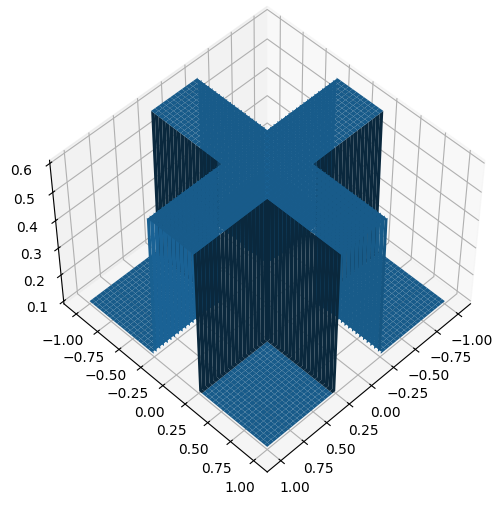

In [21]:
from matplotlib import pyplot as plt
import numpy as np


x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)

X, Y = np.meshgrid(x, y)

Z = 0.1 - np.sign(
        np.sign((X*12)**2 - 9) - 1 +
        np.sign((Y*12)**2 - 9) - 1
    ) / 2

plt.rcParams['figure.figsize'] = (8,6)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(elev=50, azim=45)
plt.show()


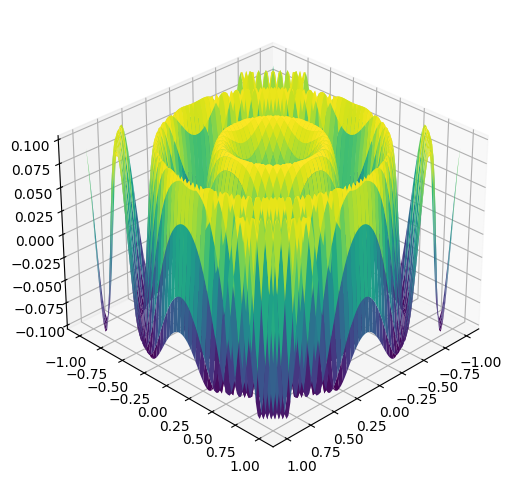

In [48]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
def z_func(x,y):
    #return 1-abs(x+y)-abs(y-x)
    return np.sin(10*(x**2+y**2))/10
Z=z_func(X,Y)
plt.rcParams['figure.figsize'] = (8,6)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis')
ax.view_init(elev=30, azim=45)
plt.show()


Fixed points: [array([ 0.        , -0.81649658,  0.        ]), array([0.        , 0.81649658, 0.        ])]


/tmp/ipykernel_3221/1869157969.py:88: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(dynamics_odeint, IC, simulationTime,


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

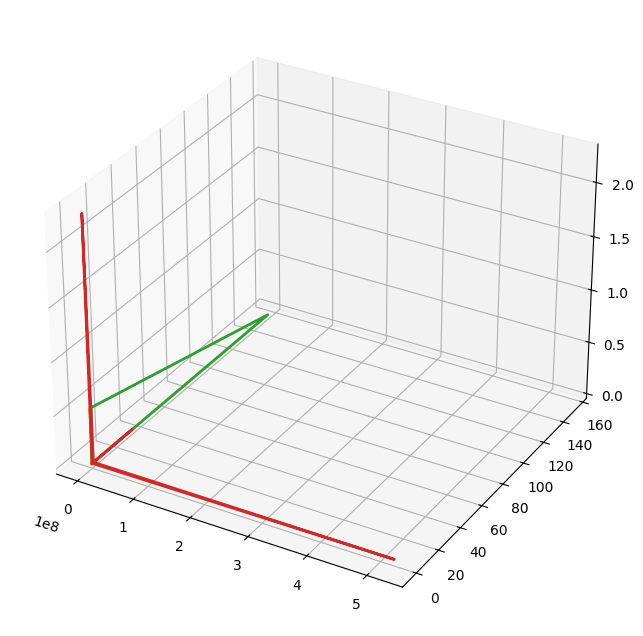

In [8]:
#  generating dynamical system phase portraits
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D

# define constants
wb = 1/3 #  to show inflationary era, wb=0 as scalar dominated so wb is irrelevant, for radiation era w=1/3, for matter era with dust w=0 and at late time scalar dominated w=0
lam_0 = 0.3 #arbitrary gradient of potential CHANGING THIS YIELDS A DIFFERENT VECTOR FIELD
# for a standard starobinsky model, 0.01<lambda<0.3 is a good range as is the potential slope. if lambda<<1 inflationary model, as lambda approaches 1, exits from inflation
# lambda = 1 transition phase, =1/3 slow roll, =0.05 quasi DeSitter appraoching


def Gamma(lam):
     #lam = max(lam, 1e-6)
     return 1-0.5*((lam+2*((2/3)**0.5))/lam)

def dynamicsStateSpace(x,y,lam):
    lam = max(lam, 1e-6)# avoids runaway lambda when kinetic energy domination goes to -
    dx = (-3*x+ np.sqrt(3/2)*lam*y**2+1.5*x*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))  #shows how the kinetic energy density fraction grows over e folds
    dy = (-np.sqrt(3/2)*x*y*lam+ 1.5*y*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))  #shows how the potential energy density fraction grows over e folds
    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)  #shows the potnetial gradient change over e folds
    return [dx, dy, dlam]

def dynamics_odeint(X,N):
  x,y,lam = X
  dx,dy,dlam = dynamicsStateSpace(x,y,lam)
  return [dx,dy,dlam]

initialState=np.array([-0.5,0.8,lam_0])

simulationTime=np.linspace(0,5,600)#  number of e folds of time
# generate the state-space trajectory
#solutionState=odeint(dynamics_odeint,initialState,simulationTime,rtol=1e-10,atol=1e-10,mxstep=500)

x_vals = solutionState[:,0]
y_vals = solutionState[:,1]
lam_vals = solutionState[:,2]

x_FP, y_FP,lam_FP = sp.symbols('x y lam', real=True)

f = (-3*x_FP+ sp.sqrt(3/2)*lam_FP*y_FP**2+ 1.5*x_FP*((1-wb)*(x_FP**2-y_FP**2) + (1+wb)*(1-x_FP**2-y_FP**2)))
g = (-sp.sqrt(3/2)*lam_FP*x_FP*y_FP + 1.5*y_FP*((1-wb)*(x_FP**2-y_FP**2)+ (1+wb)*(1-x_FP**2-y_FP**2)))
h = -sp.sqrt(6)*x_FP*lam_FP**2*(Gamma(lam_FP) - 1)

J_sym = sp.Matrix([f, g,h]).jacobian([x_FP, y_FP,lam_FP]) # Symbolic Jacobian

solutions = sp.solve([f, g,h], [x_FP, y_FP,lam_FP],dict=True)
FP_3D = []

for sol in solutions:

    x_val = sol.get(x_FP, None)
    y_val = sol.get(y_FP, None)
    lam_val = sol.get(lam_FP, None)

    # Skip solutions where lambda not specified
    if lam_val is None:
        continue

    if x_val.is_real and y_val.is_real and lam_val.is_real:

        fp_num = np.array([
            float(x_val.evalf()),
            float(y_val.evalf()),
            float(lam_val.evalf())
        ])

        FP_3D.append(fp_num)

print("Fixed points:", FP_3D)

      


fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection='3d')

# Initial conditions for trajectories and separatrices
ICs = [
    [-0.5, 0.8, lam_0],
    [0.5, -0.5, lam_0*0.7],
    [0.1, 0.9, lam_0*1.3],
    [0.7, 0.6, lam_0]
]
for IC in ICs:
    sol = odeint(dynamics_odeint, IC, simulationTime,
                 rtol=1e-10, atol=1e-10)

    ax.plot(sol[:,0], sol[:,1], sol[:,2], lw=2)
#plot FPs
for data in FP_3D:
    fp = data["fp"]
    ax.scatter(fp[0], fp[1], fp[2], s=120, c='k')

for data in FP_3D:
    if data["stability"] == "Saddle":

        fp = data["fp"]
        eigvals = data["eigvals"]
        eigvecs = data["eigvecs"]

        for i in range(3):
            if np.real(eigvals[i]) > 0:  # unstable direction

                direction = np.real(eigvecs[:, i])
                direction = direction / np.linalg.norm(direction)

                for sign in [-1, 1]:
                    IC = fp + sign*1e-4*direction

                    sol = odeint(
                        dynamics_odeint,
                        IC,
                        np.linspace(0, 15, 400),
                        rtol=1e-10,
                        atol=1e-10
                    )

                    ax.plot(sol[:,0],
                            sol[:,1],
                            sol[:,2],
                            linestyle='--')






def classify_FP(eigvals,temp=1e-10):
  Real = np.real(eigvals)
  Imag = np.imag(eigvals)
  if np.all(Real<-temp):
    stability = 'Attractor'
  elif np.all(Real>temp):
    stability = 'Repeller'
  elif np.any(Real<-temp) and np.any(Real > temp):
    stability = 'saddle'
  else:
     stability = 'Non-hyperbolic'

  return stability,point_type

    

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('lambda')

ax.set_box_aspect([1,1,1])
ax.set_title("3D Phase Portrait – Starobinsky Dynamical System")
plt.show()






Fixed Points Found:

FP: [ 0.         -0.81649658  0.        ]
Eigenvalues: [-3. -4.  0.]
Type: Nonhyperbolic

FP: [0.         0.81649658 0.        ]
Eigenvalues: [-3. -4.  0.]
Type: Nonhyperbolic



/tmp/ipykernel_3221/1309097236.py:142: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(dynamics_odeint, IC, simulationTime,


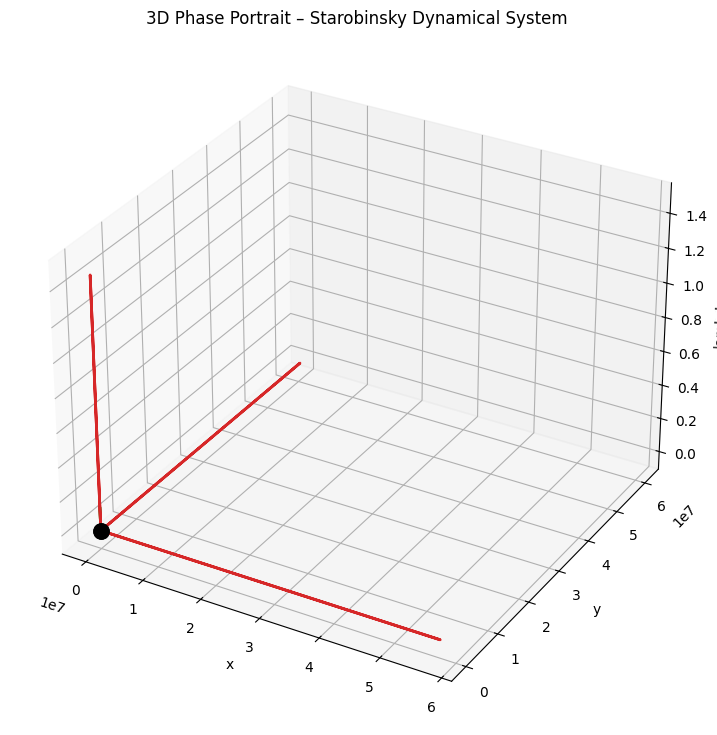

In [10]:
# ==============================
# 3D PHASE SPACE: STAROBINSKY
# ==============================

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import sympy as sp

# ------------------------------
# PARAMETERS
# ------------------------------
wb = 1/3
lam_0 = 0.3

# ------------------------------
# GAMMA FUNCTION
# ------------------------------
def Gamma(lam):
    lam = max(lam, 1e-8)
    return 1 - 0.5*((lam + 2*np.sqrt(2/3))/lam)

# ------------------------------
# DYNAMICAL SYSTEM
# ------------------------------
def dynamicsStateSpace(x, y, lam):
    lam = max(lam, 1e-8)

    dx = (-3*x
          + np.sqrt(3/2)*lam*y**2
          + 1.5*x*((1-wb)*(x**2-y**2)
          + (1+wb)*(1-x**2-y**2)))

    dy = (-np.sqrt(3/2)*lam*x*y
          + 1.5*y*((1-wb)*(x**2-y**2)
          + (1+wb)*(1-x**2-y**2)))

    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)

    return [dx, dy, dlam]

def dynamics_odeint(X, N):
    x, y, lam = X
    return dynamicsStateSpace(x, y, lam)

# ------------------------------
# SIMULATION TIME
# ------------------------------
simulationTime = np.linspace(0, 8, 600)

# ------------------------------
# SYMBOLIC FIXED POINT SEARCH
# ------------------------------
x_s, y_s, lam_s = sp.symbols('x y lam', real=True)

Gamma_sym = 1 - 0.5*((lam_s + 2*sp.sqrt(2/3))/lam_s)

f = (-3*x_s
     + sp.sqrt(3/2)*lam_s*y_s**2
     + 1.5*x_s*((1-wb)*(x_s**2-y_s**2)
     + (1+wb)*(1-x_s**2-y_s**2)))

g = (-sp.sqrt(3/2)*lam_s*x_s*y_s
     + 1.5*y_s*((1-wb)*(x_s**2-y_s**2)
     + (1+wb)*(1-x_s**2-y_s**2)))

h = -sp.sqrt(6)*x_s*lam_s**2*(Gamma_sym-1)

J_sym = sp.Matrix([f, g, h]).jacobian([x_s, y_s, lam_s])

solutions = sp.solve([f, g, h], [x_s, y_s, lam_s], dict=True)

# ------------------------------
# STABILITY CLASSIFIER
# ------------------------------
def classify_FP(eigvals, tol=1e-9):
    real = np.real(eigvals)

    if np.all(real < -tol):
        return 'Attractor'
    elif np.all(real > tol):
        return 'Repeller'
    elif np.any(real < -tol) and np.any(real > tol):
        return 'Saddle'
    else:
        return 'Nonhyperbolic'

# ------------------------------
# NUMERICAL FP ANALYSIS
# ------------------------------
FP_data = []

for sol in solutions:
    try:
        x_val = float(sol[x_s])
        y_val = float(sol[y_s])
        lam_val = float(sol[lam_s])

        # Only keep physical region
        if x_val**2 + y_val**2 <= 1.01:

            J_num = np.array(J_sym.subs({
                x_s:x_val,
                y_s:y_val,
                lam_s:lam_val
            })).astype(np.float64)

            eigvals, eigvecs = np.linalg.eig(J_num)

            FP_data.append({
                "fp": np.array([x_val, y_val, lam_val]),
                "eigvals": eigvals,
                "eigvecs": eigvecs,
                "stability": classify_FP(eigvals)
            })

    except:
        pass

print("\nFixed Points Found:\n")
for data in FP_data:
    print("FP:", data["fp"])
    print("Eigenvalues:", data["eigvals"])
    print("Type:", data["stability"])
    print()

# ------------------------------
# PLOTTING
# ------------------------------
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(projection='3d')

# Multiple initial conditions
ICs = [
    [-0.5, 0.8, lam_0],
    [0.5, -0.5, lam_0*0.7],
    [0.1, 0.9, lam_0*1.3],
    [0.7, 0.6, lam_0]
]

for IC in ICs:
    sol = odeint(dynamics_odeint, IC, simulationTime,
                 rtol=1e-10, atol=1e-10)

    ax.plot(sol[:,0], sol[:,1], sol[:,2], lw=2)

# ------------------------------
# PLOT FIXED POINTS
# ------------------------------
for data in FP_data:
    fp = data["fp"]
    ax.scatter(fp[0], fp[1], fp[2], s=120, c='k')

# ------------------------------
# DRAW SEPARATRICES FROM SADDLES
# ------------------------------
for data in FP_data:
    if data["stability"] == "Saddle":

        fp = data["fp"]
        eigvals = data["eigvals"]
        eigvecs = data["eigvecs"]

        for i in range(3):
            if np.real(eigvals[i]) > 0:  # unstable direction

                direction = np.real(eigvecs[:, i])
                direction = direction / np.linalg.norm(direction)

                for sign in [-1, 1]:
                    IC = fp + sign*1e-4*direction

                    sol = odeint(
                        dynamics_odeint,
                        IC,
                        np.linspace(-15, 15, 400),
                        rtol=1e-10,
                        atol=1e-10
                    )

                    ax.plot(sol[:,0],
                            sol[:,1],
                            sol[:,2],
                            linestyle='--')

# ------------------------------
# FINAL PLOT SETTINGS
# ------------------------------
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("lambda")
#ax.set_box_aspect([1,1,1])
ax.set_title("3D Phase Portrait – Starobinsky Dynamical System")

plt.show()


In [ ]:
# defining a grid of points at which we create/compute tangent arrows
x0 = np.linspace(-1.5,1.5,100)
x1 = np.linspace(-1.5,1.5,100)
x2 = np.linspace(-1.5,1.5,100)
X0,X1,X2 = np.meshgrid(x0,x1,x2)
dX0 = np.zeros(X0.shape)
dX1 = np.zeros(X1.shape)
dX2 = np.zeros(X1.shape)

for i in range(X0.shape[0]):
    for j in range(X0.shape[1]):
        for k in range(X0.shape[2]):
          if X0[i,j,k]**2 + X1[i,j,k]**2 <= 1.0:
              dx,dy,dlam= dynamicsStateSpace(X0[i,j,k], X1[i,j,k], X2[i,j,k])
              dX0[i,j,k] = dx
              dX1[i,j,k] = dy
              dX2[i,j,k]=dlam
          else:
              dX0[i,j,k] = np.nan
              dX1[i,j,k] = np.nan

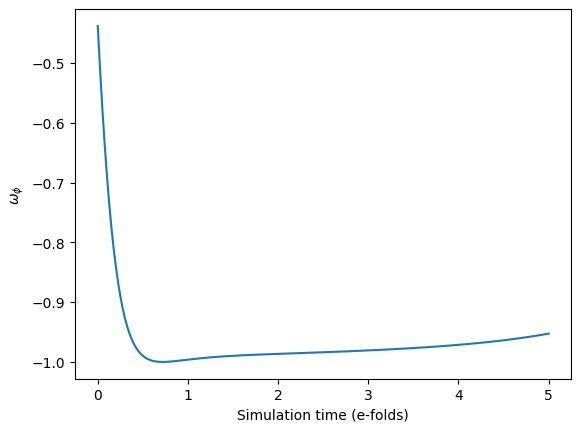

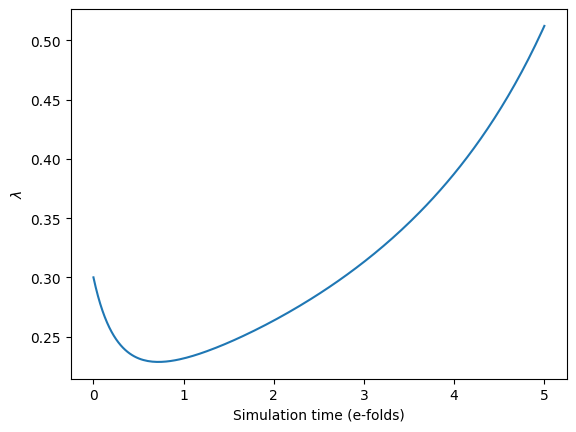

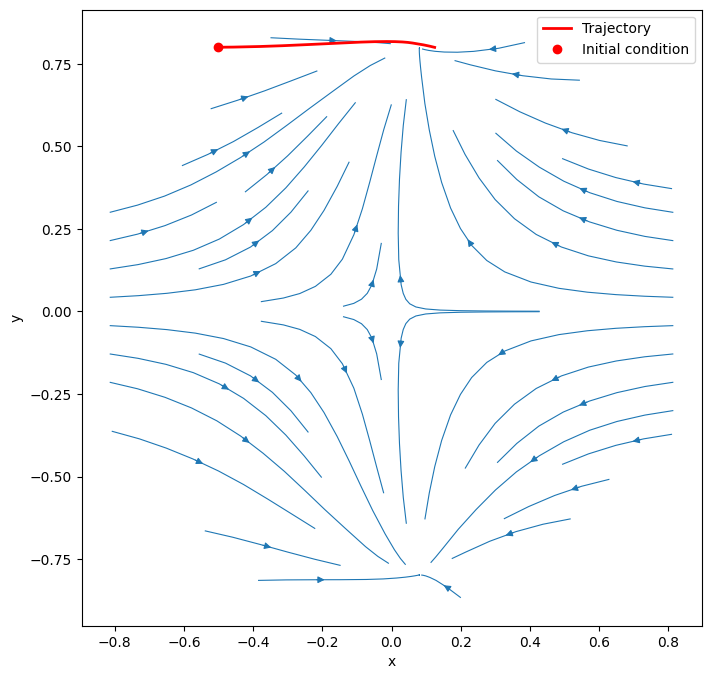

Physical fixed points: [[ 0.          0.          0.        ]
 [ 0.         -0.81649658  0.        ]
 [ 0.          0.81649658  0.        ]]


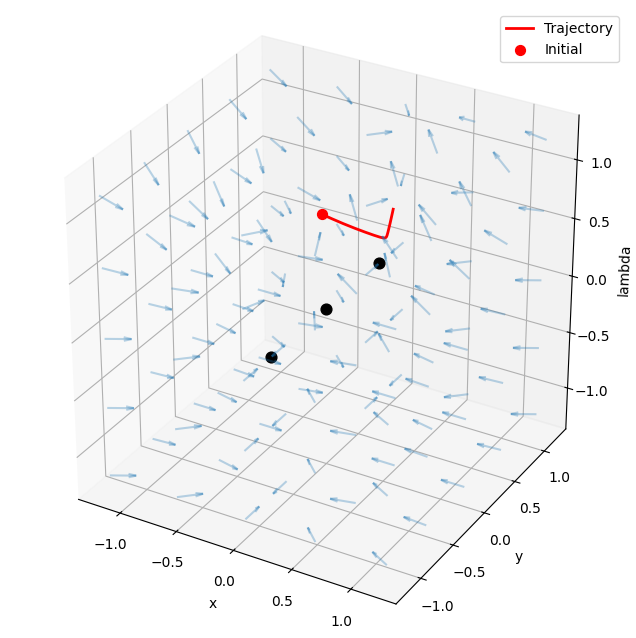

In [3]:
#  generating dynamical system phase portraits
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D

# --- Constants ---
wb = 1/3  # radiation era
lam_0 = 0.3  # initial gradient of potential

# --- Functions ---
def Gamma(lam):
    return 1 - 0.5*((lam + 2*np.sqrt(2/3))/lam)

def dynamicsStateSpace(x, y, lam):
    lam = max(lam, 1e-6)  # avoid runaway
    dx = (-3*x + np.sqrt(3/2)*lam*y**2 + 1.5*x*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))
    dy = (-np.sqrt(3/2)*x*y*lam + 1.5*y*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))
    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)
    return [dx, dy, dlam]

def dynamics_odeint(X, N):
    x, y, lam = X
    dx, dy, dlam = dynamicsStateSpace(x, y, lam)
    return [dx, dy, dlam]

# --- Simulation ---
initialState = np.array([-0.5, 0.8, lam_0])
simulationTime = np.linspace(0, 5, 200)
solutionState = odeint(dynamics_odeint, initialState, simulationTime, rtol=1e-10, atol=1e-10, mxstep=500)

x_vals = solutionState[:,0]
y_vals = solutionState[:,1]
lam_vals = solutionState[:,2]
w_phi = np.divide(x_vals**2 - y_vals**2, x_vals**2 + y_vals**2, 
                  out=np.zeros_like(x_vals), where=(x_vals**2 + y_vals**2)!=0)

# --- 2D Plots ---
plt.figure()
plt.plot(simulationTime, w_phi)
plt.ylabel(r'$\omega_\phi$')
plt.xlabel('Simulation time (e-folds)')
plt.show()

plt.figure()
plt.plot(simulationTime, lam_vals)
plt.ylabel(r'$\lambda$')
plt.xlabel('Simulation time (e-folds)')
plt.show()

# --- 2D vector field (x-y plane) ---
x0 = np.linspace(-1.5, 1.5, 20)
x1 = np.linspace(-1.5, 1.5, 20)
X0, X1 = np.meshgrid(x0, x1)
dX0 = np.zeros_like(X0)
dX1 = np.zeros_like(X1)

for i in range(X0.shape[0]):
    for j in range(X0.shape[1]):
        if X0[i,j]**2 + X1[i,j]**2 <= 1.0:
            dx, dy, _ = dynamicsStateSpace(X0[i,j], X1[i,j], lam_0)  # use fixed lam_0
            dX0[i,j] = dx
            dX1[i,j] = dy
        else:
            dX0[i,j] = np.nan
            dX1[i,j] = np.nan

plt.figure(figsize=(8,8))
plt.streamplot(X0, X1, dX0, dX1, density=1.2, linewidth=0.8)
plt.plot(x_vals, y_vals, 'r', lw=2, label='Trajectory')
plt.plot(x_vals[0], y_vals[0], 'ro', label='Initial condition')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# --- Symbolic fixed points ---
x_FP, y_FP, lam_FP = sp.symbols('x y lam', real=True)

# SymPy-compatible Gamma
def Gamma_sym(lam):
    return 1 - 0.5*((lam + 2*sp.sqrt(2/3))/lam)

f = (-3*x_FP + sp.sqrt(3/2)*lam_FP*y_FP**2 + 1.5*x_FP*((1-wb)*(x_FP**2 - y_FP**2) + (1+wb)*(1 - x_FP**2 - y_FP**2)))
g = (-sp.sqrt(3/2)*lam_FP*x_FP*y_FP + 1.5*y_FP*((1-wb)*(x_FP**2 - y_FP**2) + (1+wb)*(1 - x_FP**2 - y_FP**2)))
h = -sp.sqrt(6)*x_FP*lam_FP**2*(Gamma_sym(lam_FP) - 1)

solutions = sp.solve([f, g, h], [x_FP, y_FP, lam_FP], dict=True)
FP = []

for sol in solutions:
    x_val = sol.get(x_FP, 0.0)  # default 0 if missing
    y_val = sol.get(y_FP, 0.0)
    lam_val = sol.get(lam_FP, 0.0)
    # only keep real solutions
    if sp.im(x_val)==0 and sp.im(y_val)==0 and sp.im(lam_val)==0:
        FP.append([float(sp.re(x_val)), float(sp.re(y_val)), float(sp.re(lam_val))])
FP = np.array(FP)
print("Physical fixed points:", FP)


# --- 3D Phase Plot ---
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

# 3D trajectory
ax.plot(x_vals, y_vals, lam_vals, 'r', lw=2, label='Trajectory')
ax.scatter(x_vals[0], y_vals[0], lam_vals[0], color='r', s=50, label='Initial')

# 3D Vector Field
grid = np.linspace(-1.2, 1.2, 5)
Xg, Yg, Lg = np.meshgrid(grid, grid, grid)
dX = np.zeros_like(Xg)
dY = np.zeros_like(Yg)
dL = np.zeros_like(Lg)

for i in range(Xg.shape[0]):
    for j in range(Xg.shape[1]):
        for k in range(Xg.shape[2]):
            dx, dy, dl = dynamicsStateSpace(Xg[i,j,k], Yg[i,j,k], Lg[i,j,k])
            dX[i,j,k] = dx
            dY[i,j,k] = dy
            dL[i,j,k] = dl

ax.quiver(Xg, Yg, Lg, dX, dY, dL, length=0.2, normalize=True, alpha=0.3)

# Plot fixed points
for fp in FP:
    ax.scatter(fp[0], fp[1], fp[2], color='k', s=60)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('lambda')
ax.set_box_aspect([1,1,1])
plt.legend()
plt.show()


Fixed Point: (0.0000, 0.0000, 0.1000)
Eigenvalues: [ 0.  -1.5  1.5]
Type = Node
Stability = Saddle

Fixed Point: (0.0000, 0.7071, 0.0000)
Eigenvalues: [ 8.50828289e-07 -3.00000057e+00 -3.00000622e+00]
Type = Node
Stability = Saddle

Fixed Point: (-0.0000, -0.0000, 0.1102)
Eigenvalues: [-2.27074211e-16  1.50000000e+00 -1.50000000e+00]
Type = Node
Stability = Saddle

Fixed Point: (-0.0000, -0.0000, 1.0289)
Eigenvalues: [-1.30009969e-14  1.50000000e+00 -1.50000000e+00]
Type = Node
Stability = Saddle



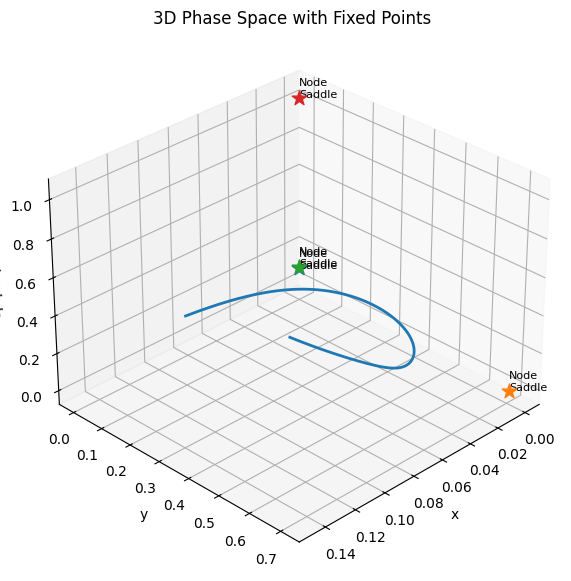

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import Axes3D

# -------------------------
# Parameters
# -------------------------
wb = 0     # radiation era
lam_0 = 0.3   # initial lambda

# -------------------------
# Functions
# -------------------------
def Gamma(lam):
    return 1 - 0.5*((lam + 2*np.sqrt(2/3))/lam)

def dynamicsStateSpace(x, y, lam):
    lam = max(lam, 1e-6)  # avoid runaway
    dx = (-3*x 
          + np.sqrt(3/2)*lam*y**2 
          + 1.5*x*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))
    
    dy = (-np.sqrt(3/2)*x*y*lam 
          + 1.5*y*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))
    
    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)
    
    return np.array([dx, dy, dlam])

def dynamics_odeint(X, N):
    x, y, lam = X
    return dynamicsStateSpace(x, y, lam)

# -------------------------
# Jacobian (numerical)
# -------------------------
def jacobian(f, X, h=1e-6):
    n = len(X)
    J = np.zeros((n,n))
    f0 = f(*X)
    for i in range(n):
        X_step = np.array(X, dtype=float)
        X_step[i] += h
        fi = f(*X_step)
        J[:, i] = (fi - f0)/h
    return J

# -------------------------
# Stability classifier
# -------------------------
def classify_FP(eigvals, temp=1e-8):
    Real = np.real(eigvals)
    Imag = np.imag(eigvals)

    if np.all(Real < -temp):
        stability = 'Attractor'
    elif np.all(Real > temp):
        stability = 'Repeller'
    elif np.any(Real > temp) and np.any(Real < -temp):
        stability = 'Saddle'
    elif np.all(np.abs(Real) < temp):
        stability = 'Centre'
    else:
        stability = 'Indeterminate'

    if np.any(np.abs(Imag) > temp):
        point_type = 'Spiral'
    else:
        point_type = 'Node'

    return stability, point_type

# -------------------------
# Find Fixed Points
# -------------------------
def find_fixed_point(guess):
    sol = fsolve(lambda X: dynamicsStateSpace(*X), guess)
    return sol

# Try multiple guesses
guesses = [
    [0, 0, 0.1],
    [0.5, 0.5, 0.5],
    [-0.5, 0.5, 0.5],
    [0.1, 0.1, 1]
]

FP = []
for g in guesses:
    try:
        fp = find_fixed_point(g)
        if not any(np.allclose(fp, p, atol=1e-4) for p in FP):
            FP.append(fp)
    except:
        pass

# -------------------------
# Plot trajectory
# -------------------------
N = np.linspace(0, 5, 2000)
X0 = [0.1, 0.1, lam_0]
sol = odeint(dynamics_odeint, X0, N)

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

# Plot trajectory
ax.plot(sol[:,0], sol[:,1], sol[:,2], lw=2)

# -------------------------
# Analyze & Plot Fixed Points
# -------------------------
for fp in FP:
    x_c, y_c, lam_c = fp
    
    J = jacobian(dynamicsStateSpace, fp)
    eigvals = np.linalg.eigvals(J)
    
    stability, point_type = classify_FP(eigvals)

    print(f"Fixed Point: ({x_c:.4f}, {y_c:.4f}, {lam_c:.4f})")
    print("Eigenvalues:", eigvals)
    print(f"Type = {point_type}")
    print(f"Stability = {stability}\n")

    ax.scatter(x_c, y_c, lam_c, s=120, marker='*')
    ax.text(x_c, y_c, lam_c,
            f"{point_type}\n{stability}",
            fontsize=8)

# -------------------------
# Labels
# -------------------------
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('lambda')
ax.view_init(elev=30, azim=45)
plt.title("3D Phase Space with Fixed Points")
plt.show()


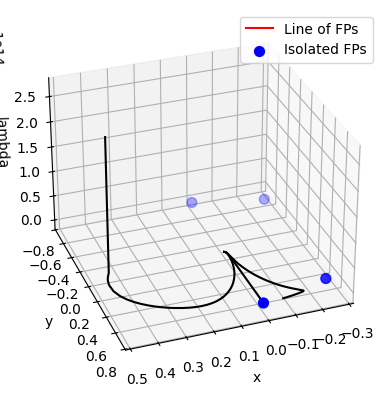

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define system
def odes(t, vars):
    x, y, lam = vars
    dx = -3*x + np.sqrt(3/2)*lam*y**2 + 3/2*x*(1-2*y**2)
    dy = -np.sqrt(3/2)*x*y*lam + 3/2*y*(1-2*y**2)
    dlam = np.sqrt(6)/2 * x*lam**2 + 2*x*lam
    return [dx, dy, dlam]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the line of FPs
lam_vals = np.linspace(-2, 2, 50)
ax.plot(np.zeros_like(lam_vals), np.zeros_like(lam_vals), lam_vals, 'r', label='Line of FPs')

# Plot isolated FPs
ax.scatter([0,0,-0.263,-0.263], [1/np.sqrt(2),-1/np.sqrt(2),0.57,-0.57], [0,0,-1.633,-1.633], color='b', s=50, label='Isolated FPs')

# Example trajectories near the line
for lam0 in [-1,0,1]:
    sol = solve_ivp(odes, [0,10], [0.01, 0.01, lam0], max_step=0.05)
    ax.plot(sol.y[0], sol.y[1], sol.y[2], 'k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('lambda')
ax.legend()
ax.view_init(elev=30, azim=70)
plt.show()


Fixed points: [[ 0.          0.          0.        ]
 [-0.26259518 -0.57003206 -1.63299316]
 [-0.26259518  0.57003206 -1.63299316]
 [ 0.         -0.70710678  0.        ]
 [ 0.          0.70710678  0.        ]]


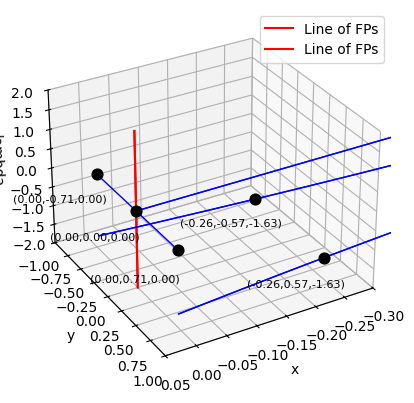

In [44]:
wb = 0     # radiation era
lam_0 = 0.3   # initial lambda


def Gamma(lam):
    return 1 - 0.5*((lam + 2*np.sqrt(2/3))/lam)

def dynamicsStateSpace(t, X):
    x,y,lam=X
    lam = max(lam, 1e-6)  # avoid runaway
    dx = (-3*x 
          + np.sqrt(3/2)*lam*y**2 
          + 1.5*x*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))
    
    dy = (-np.sqrt(3/2)*x*y*lam 
          + 1.5*y*((1-wb)*(x**2-y**2)+(1+wb)*(1-x**2-y**2)))
    
    dlam = -np.sqrt(6)*x*lam**2*(Gamma(lam)-1)
    
    return np.array([dx, dy, dlam])



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the line of FPs  (0,0,lambda)
lam_vals = np.linspace(-2, 2, 50)
ax.plot(np.zeros_like(lam_vals), np.zeros_like(lam_vals), lam_vals, 'r', label='Line of FPs')

x_FP, y_FP, lam_FP = sp.symbols('x y lam', real=True)

def Gamma_sym(lam):
    #lam = max(lam, 1e-6)
    return 1 - 0.5*((lam + 2*sp.sqrt(2/3))/lam)

f = (-3*x_FP + sp.sqrt(3/2)*lam_FP*y_FP**2 + 1.5*x_FP*((1-wb)*(x_FP**2 - y_FP**2) + (1+wb)*(1 - x_FP**2 - y_FP**2)))
g = (-sp.sqrt(3/2)*lam_FP*x_FP*y_FP + 1.5*y_FP*((1-wb)*(x_FP**2 - y_FP**2) + (1+wb)*(1 - x_FP**2 - y_FP**2)))
h = -sp.sqrt(6)*x_FP*lam_FP**2*(Gamma_sym(lam_FP) - 1)

solutions = sp.solve([f, g, h], [x_FP, y_FP, lam_FP], dict=True)
FP = []

for sol in solutions:
    x_val = sol.get(x_FP, 0)    # default 0 if missing
    y_val = sol.get(y_FP, 0)
    lam_val = sol.get(lam_FP, 0)

    # only keep real solutions
    if sp.im(x_val)==0 and sp.im(y_val)==0 and sp.im(lam_val)==0:
        FP.append([float(sp.re(x_val)), float(sp.re(y_val)), float(sp.re(lam_val))])
FP = np.array(FP)
print("Fixed points:", FP)

delta = 1e-3
time = [0,20]
time_backwards = [0,-20]

x_s, y_s, lam_s = sp.symbols('x y lam', real=True)

Gamma_sym = 1 - 0.5*((lam_s + 2*sp.sqrt(2/3))/lam_s)

f = (-3*x_s
     + sp.sqrt(3/2)*lam_s*y_s**2
     + 1.5*x_s*((1-wb)*(x_s**2-y_s**2)
     + (1+wb)*(1-x_s**2-y_s**2)))

g = (-sp.sqrt(3/2)*lam_s*x_s*y_s
     + 1.5*y_s*((1-wb)*(x_s**2-y_s**2)
     + (1+wb)*(1-x_s**2-y_s**2)))

h = -sp.sqrt(6)*x_s*lam_s**2*(Gamma_sym-1)

J_sym = sp.Matrix([f, g, h]).jacobian([x_s, y_s, lam_s])
J_func = sp.lambdify((x_s, y_s, lam_s), J_sym, 'numpy')

#   FP line for (0,0,lambda)
lam_vals = np.linspace(-2, 2, 50)
ax.plot(np.zeros_like(lam_vals), np.zeros_like(lam_vals), lam_vals, 'r', label='Line of FPs')


for fp in FP:
    x_c, y_c, lam_c = fp

    #print(f"Fixed Point: ({x_c:.4f}, {y_c:.4f}, {lam_c:.4f})")

    ax.scatter(x_c, y_c, lam_c, s=60, marker='o',color='k')
    ax.text(x_c+0.15, y_c+0.15, lam_c+0.15, f"({x_c:.2f},{y_c:.2f},{lam_c:.2f})", fontsize=8)

    J = np.array(J_func(x_c, y_c, lam_c), dtype=float)
    eigvals,eigvecs = np.linalg.eig(J)
    

    for i in range(3):
        if np.real(eigvals[i]) > 0:
            vec = np.real(eigvecs[:,i])
            vec /= np.linalg.norm(vec)

            for sign in [-1,1]:
                X0 = [x_c + sign*delta*vec[0], y_c + sign*delta*vec[1], lam_c + sign*delta*vec[2]]
                sol_fwd = solve_ivp(dynamicsStateSpace, time, X0, max_step=0.01)
                sol_bwd = solve_ivp(dynamicsStateSpace, time_backwards, X0, max_step=0.01)

                # Plot forward trajectory
                ax.plot(sol_fwd.y[0], sol_fwd.y[1], sol_fwd.y[2], 'b', lw=1)
                # Plot backward trajectory
                ax.plot(sol_bwd.y[0], sol_bwd.y[1], sol_bwd.y[2], 'b', lw=1)







ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('lambda')
ax.set_xlim([-0.3,0.05])
ax.set_ylim([-1,1])
ax.set_zlim([-2,2])
ax.legend()
ax.view_init(elev=30, azim=60)
plt.show()